<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS4132 Data Analytics</b> </font>

# Lab 9: Data Communication

Complete the following questions and upload your `.ipynb` file to Coursemology.

Name the file in the following format:

`Lab<Num><YourName>.ipynb`

We will be using the dataset on Canadian Immigration below:

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
# perform some data cleaning
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.set_index('Country', inplace=True)
df_can
df_can['Total'] = df_can.iloc[:,4:].sum(axis=1)
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58623
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15698
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69359
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,95955
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2984


## Percentage Stack Area Chart

#### a) Create a percentage stack area chart for the data below.

In [3]:
sasia = df_can.loc[['Singapore','Thailand','Viet Nam','Malaysia']]
sasia = sasia[range(2010, 2014)].sort_values(2013, ascending=False, axis=0)
sasia

,2010,2011,2012,2013
Country,,,,
Viet Nam,1942,1723,1731,2112
Thailand,499,396,296,400
Malaysia,802,409,358,204
Singapore,805,219,146,141


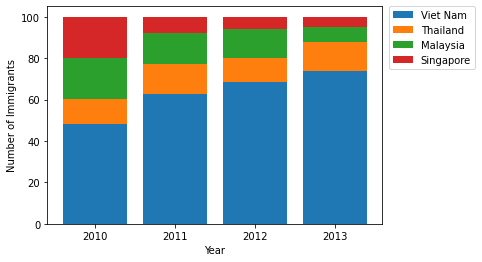

In [4]:
#your solution
dnf = sasia.copy()/sasia.sum(0)*100
labels = ['2010','2011','2012','2013']
	 
plt.bar(labels, dnf.iloc[0],  label=dnf.index[0]) #plot the bottom most bar first
#use the bottom parameter to set the y coordinate(s) of the bars bases of the remaining bars
plt.bar(labels, dnf.iloc[1],  label=dnf.index[1], bottom=dnf.iloc[0]) 
plt.bar(labels, dnf.iloc[2],  label=dnf.index[2], bottom=dnf.iloc[0]+dnf.iloc[1])
plt.bar(labels, dnf.iloc[3],  label=dnf.index[3], bottom=dnf.iloc[0]+dnf.iloc[1]+dnf.iloc[2])
	 
plt.legend()#show legend
	 
	#place legend in upper left corder outside of the chart plot area
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) 
	 
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')
plt.show()

## Stacked Area Chart

#### b) Create a stacked area plot of the 5 countries that contributed the most to immigration to Canada from 1980 to 2013. Use a transparency value of 0.25.

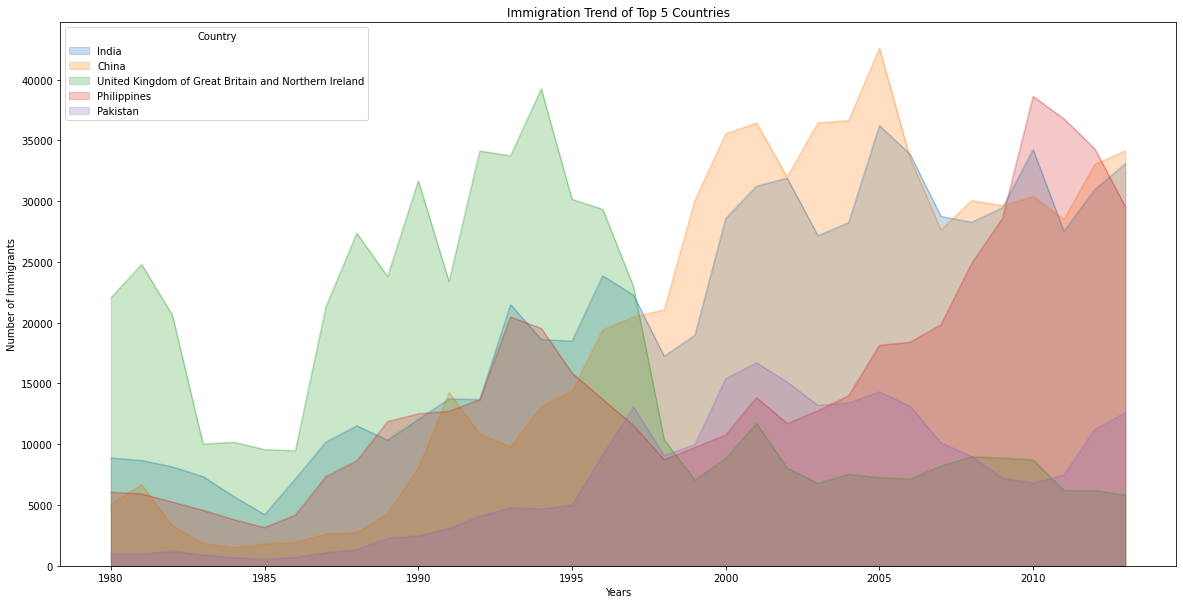

In [5]:
#your solution
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
years = range(1980, 2014)
df_top5 = df_can.head()
df_top5 = df_top5[years].transpose() 
df_top5.plot(kind='area', 
				alpha=0.25,
	            stacked=False,
	            figsize=(20, 10),
	            )
	 
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
	 
plt.show()

## Labeling using `.text()`

#### c) Plot a line graph to visualize the number of immigrants from India, China and Philippines over the years. 

You should hide the legend. Instead, label the line using `.text()` function. 

Your final graph should look as follows:

In [6]:
#Your final graph should look as follows:

Text(2000, 8000, 'Phillipines')

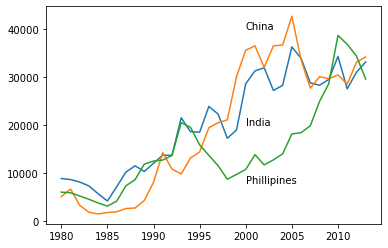

In [7]:
#your solution
ax=pd.DataFrame(df_top5[['India', 'China', 'Philippines']]).plot()
ax.get_legend().remove()
ax.text(2000, 20000, 'India')
ax.text(2000, 40000, 'China')
ax.text(2000, 8000, 'Phillipines')

## Annotation

#### d) Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013. Plot a bar graph which shows the number of immigrants per year.

Your final graph should look as follows:

In [8]:
#Your final graph should look as follows:

<AxesSubplot:title={'center':'Icelandic immigrants to Canada from 1980 to 2013'}, xlabel='Year', ylabel='Number of Immigrants'>

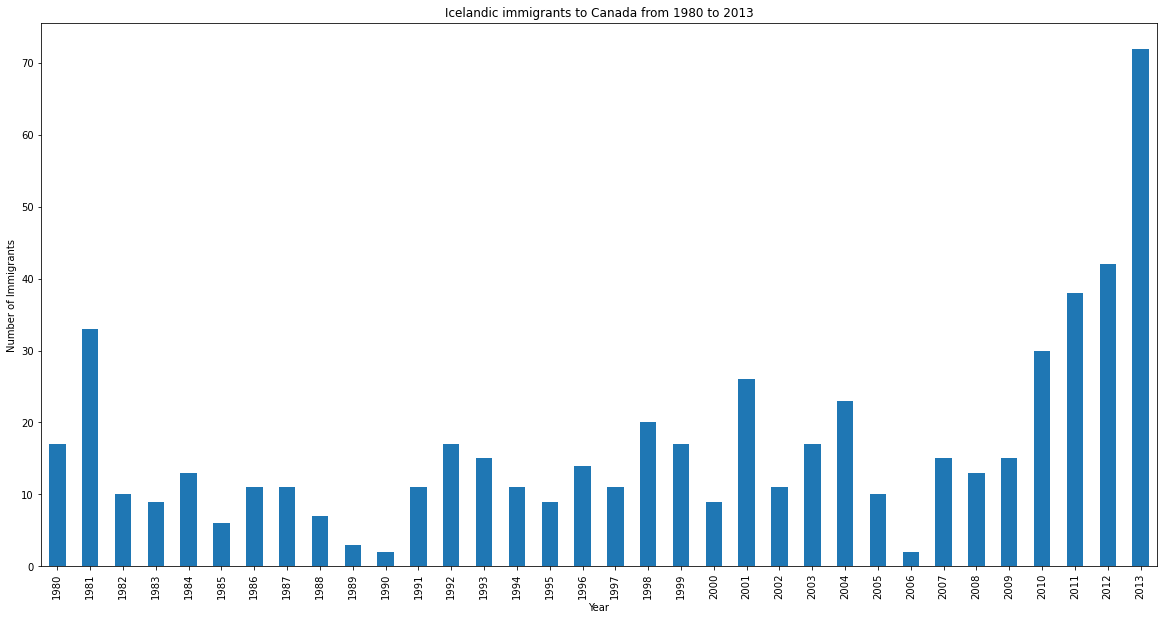

In [9]:
#your solution
plt.figure(figsize=(20, 10))
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')
df_can.loc['Iceland', 1980:2013].plot(kind='bar')

#### e) The bar plot in (d) shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008. 

i) Let's annotate this on the plot using the `annotate` method. Draw an arrow using `annotate` to show the rapid increase after 2008.

You should make use of the following parameters:
- `s`: str, the text of annotation.
- `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- `arrowprops`: Takes a dictionary of properties to draw the arrow:
    - `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    - `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    - `color`: Specifes color of arror.
    - `lw`: Specifies the line width.

ii) Next, let's also annotate a text to go over the arrow.  Label the arrow with the text '2008 - 2011 Financial Crisis'.

You should make use of the following additional parameters:
- `rotation`: rotation angle of text in degrees (counter clockwise)
- `va`: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- `ha`: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]


You may read the Matplotlib documentation for more details on annotations: 
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate.

Your final graph should look as follows:

In [10]:
#Your final graph should look as follows:

Text(28, 26, '2008 - 2011 Financial Crisis')

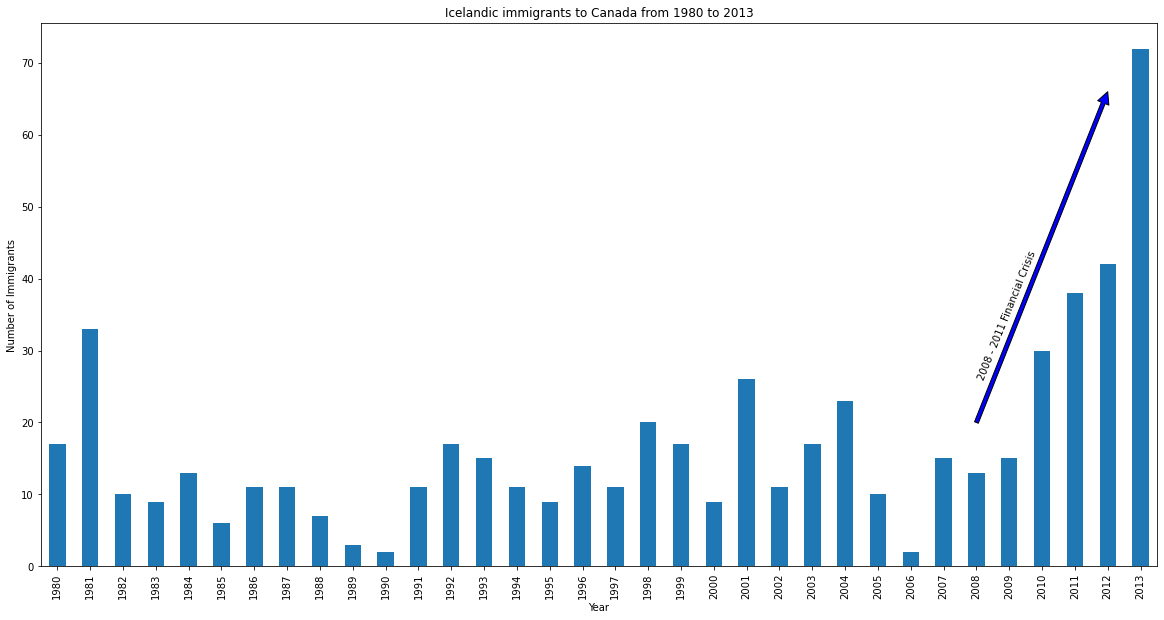

In [11]:
#your solution
plt.figure(figsize=(20, 10))
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')
ax = df_can.loc['Iceland', 1980:2013].plot(kind='bar')
plt.annotate('', xy=(32, 66), xytext=(28, 20), arrowprops=dict(facecolor='blue'))
plt.annotate('2008 - 2011 Financial Crisis', xy=(32, 72), xytext=(28, 26), rotation=68)

iii) To further highlight the changes in years 2008 to 2013, we can highlight these bars in a different color. Add relevent code to achieve this.

['C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C0', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1']


Text(28, 26, '2008 - 2011 Financial Crisis')

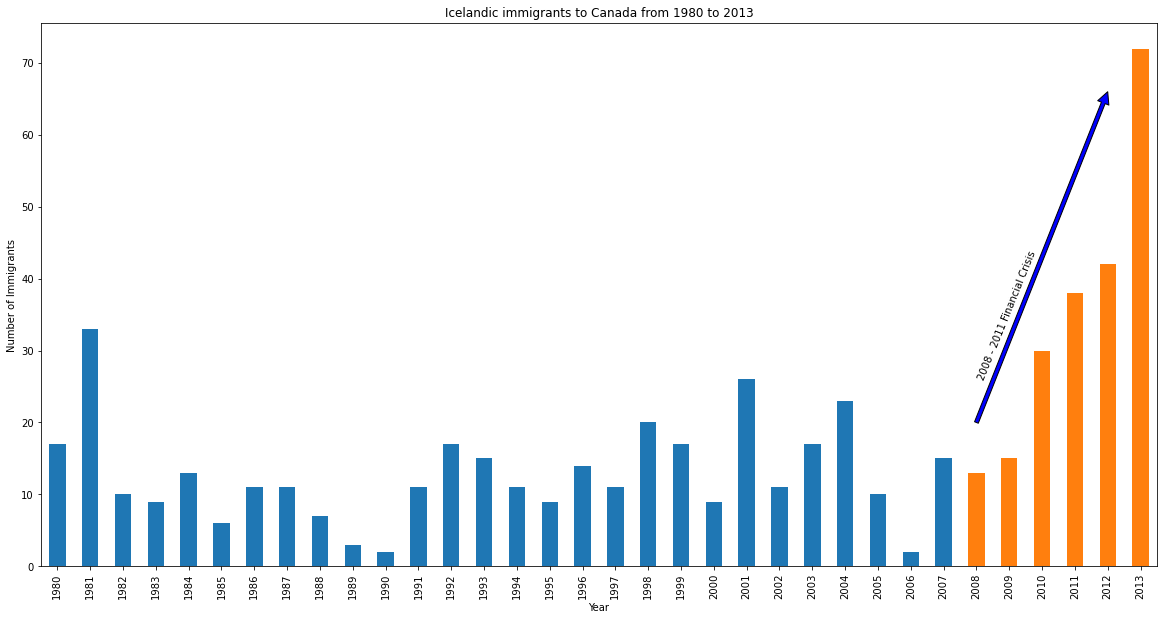

In [12]:
#your solution
lst = ['C0'] * 28 + ['C1'] * 6
print(lst)
plt.figure(figsize=(20, 10))
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')
ax = df_can.loc['Iceland', 1980:2013].plot(kind='bar', color=lst)
plt.annotate('', xy=(32, 66), xytext=(28, 20), arrowprops=dict(facecolor='blue'))
plt.annotate('2008 - 2011 Financial Crisis', xy=(32, 72), xytext=(28, 26), rotation=68)

## Small Multiples

#### f) We will experiment using subplots to create "small multiples" visualization. 

We wish to compare the number of immigrants from India with other top 9 Asian countries. Create a small multiple plot similar to the one shown below.

In [13]:
#Your final graph should look as follows:

Text(0.5, 0.98, 'Small Multiples Example')

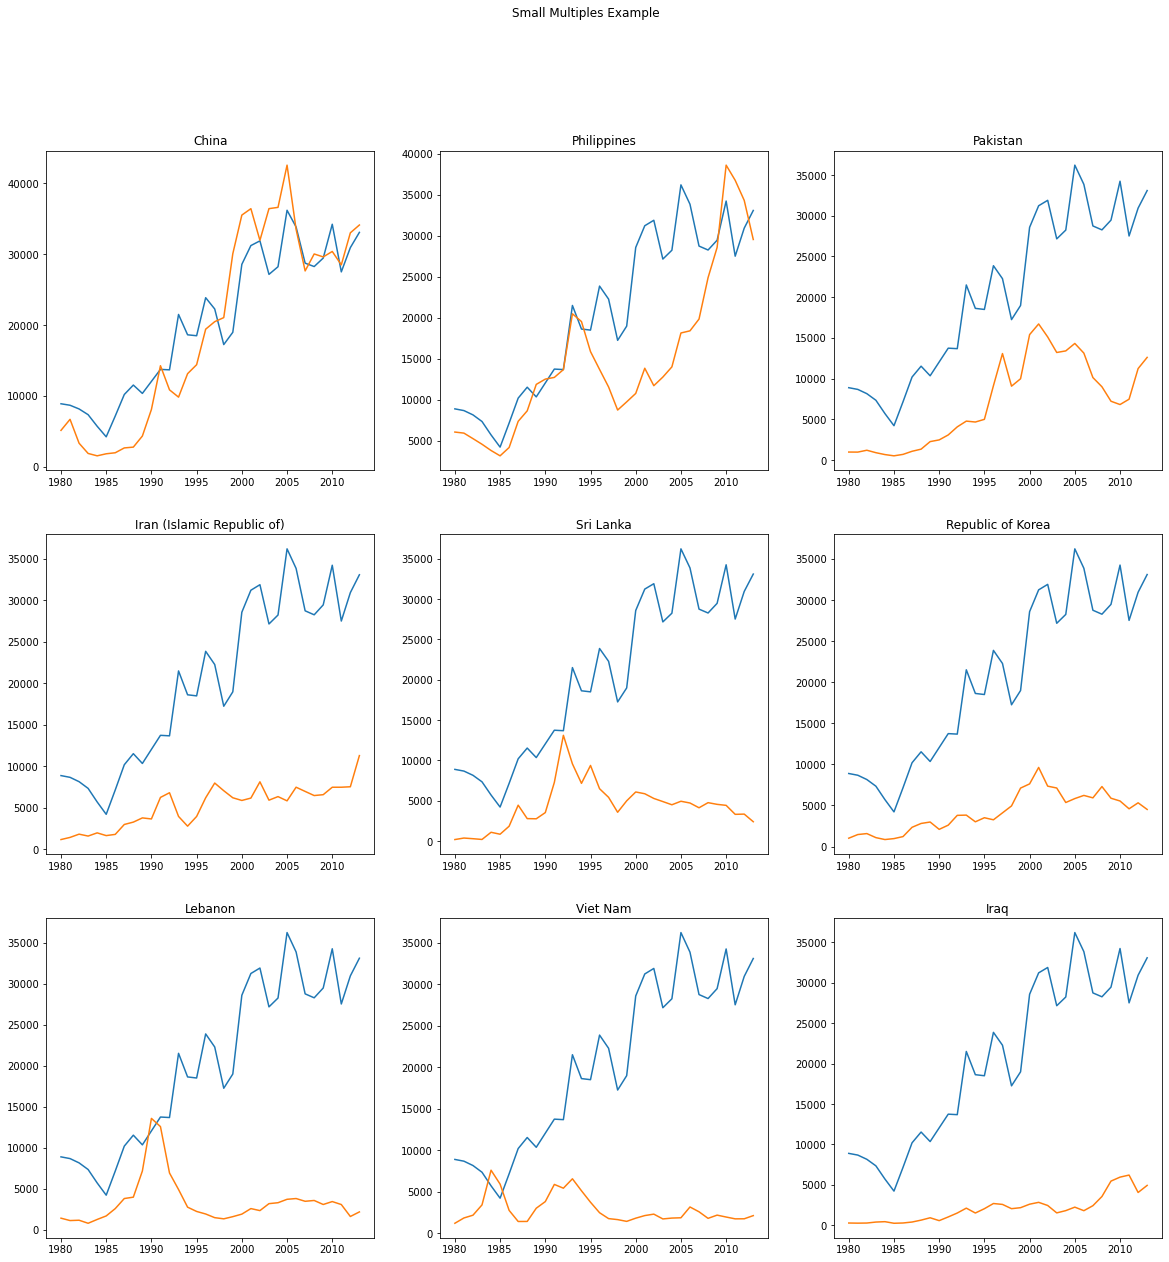

In [14]:
#your solution
df_list=df_can[df_can.Continent == 'Asia'].sort_values(by='Total', ascending=False)[:10]

nrow=3
ncol=3
	 
fig, axes = plt.subplots(nrow, ncol,figsize=(20,20))
	 

count=1
for r in range(nrow):
	for c in range(ncol):
		ax = df_list.iloc[[0, count]][range(1980, 2014)].T.plot(ax=axes[r,c])
		ax.get_legend().remove()
		axes[r,c].set_title(df_list.index[count]) #give every subplot a title
		count+=1
	        
plt.suptitle("Small Multiples Example") 

Notice that the y-axis is not consistent amongst the plots and it's unclear what each line refers to. Standardize the y-axis (maximum of 40000) and add a legend for the plots.

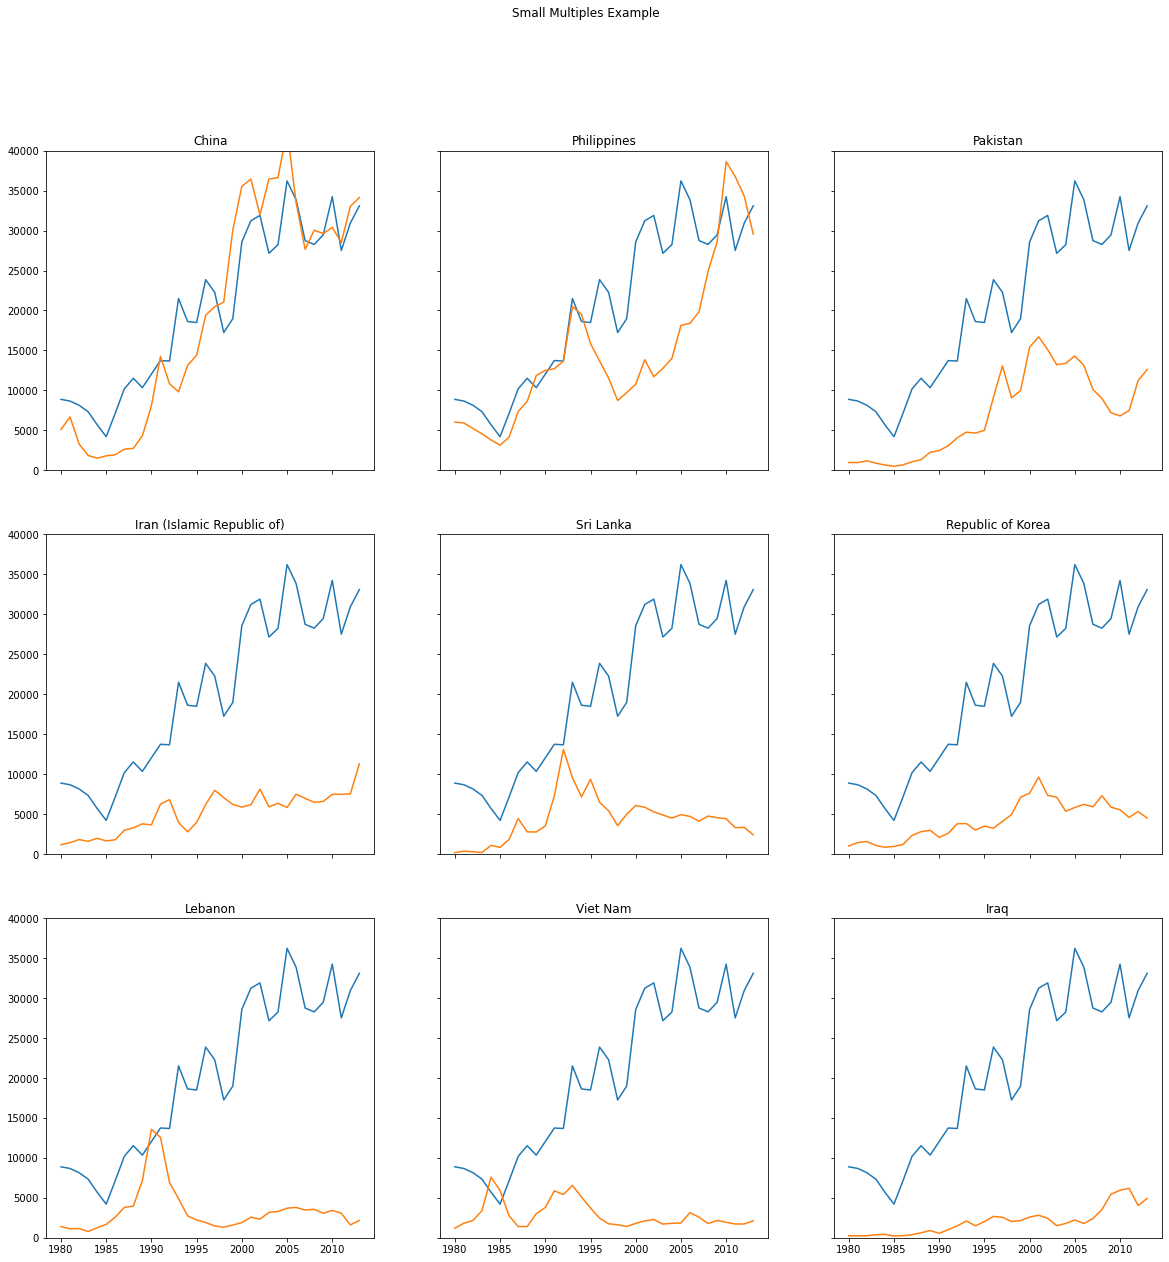

In [15]:
#your solution
df_list=df_can[df_can.Continent == 'Asia'].sort_values(by='Total', ascending=False)[:10]

nrow=3
ncol=3
	 
fig, axes = plt.subplots(nrow, ncol,figsize=(20,20))
	 

count=1
for r in range(nrow):
	for c in range(ncol):
		ax = df_list.iloc[[0, count]][range(1980, 2014)].T.plot(ax=axes[r,c])
		ax.get_legend().remove()
		ax.set_ylim(0, 40000)
		axes[r,c].set_title(df_list.index[count]) #give every subplot a title
		count+=1
	        
plt.suptitle("Small Multiples Example") 

for ax in axes.flat:
	ax.label_outer()

## Waffle Chart

#### g) We would like to visualize the portion of immigrates from Singapore, Malaysia and Indonesian over the years. Plot a waffle chart. Make sure to have a legend.

You may wish to refer to the pywaffle documentation: https://readthedocs.org/projects/pywaffle/downloads/pdf/latest/

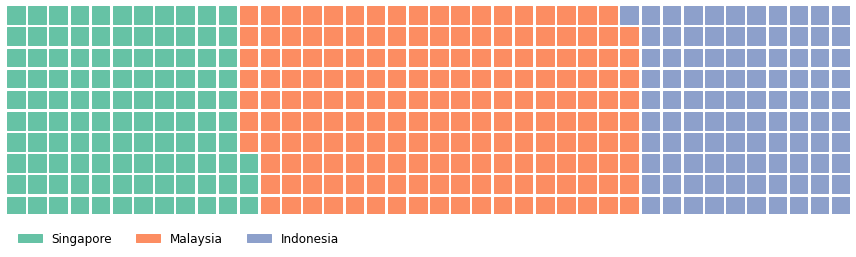

In [16]:
#your solution
import matplotlib.pyplot as plt
data = df_can.loc[['Singapore', 'Malaysia', 'Indonesia']]
data = data['Total'].T
from pywaffle import Waffle
fig = plt.figure(
	FigureClass=Waffle, 
	rows=10, 
	columns=40, 
	values=data,
	figsize=(12, 8),  # figsize is a parameter of matplotlib.pyplot.figure
	labels = data.index.to_list(),
	legend={
	    'loc': 'lower left',
	    'bbox_to_anchor': (0, -0.2),
	    'ncol': len(df_can),
	    'framealpha': 0,
	    'fontsize': 12
	    }
)
plt.show()

## Joyplot

#### h) We would like to visualize the distribution of number of immigrants in 2013 for each continent. Plot a joyplot to visualize this. 

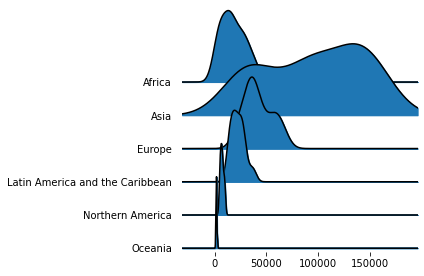

In [17]:
#your solution
import joypy
jpdata = df_can.groupby('Continent')[np.arange(1980, 2013)].sum().T
fig, axes = joypy.joyplot(jpdata,  ylim='own')

## Heatmap

#### i) We would like to visualize the number of immigrants to Canada from Region 'South-Eastern Asia' from 2000 to 2013. Plot a heatmap to visualize this.

<AxesSubplot:ylabel='Country'>

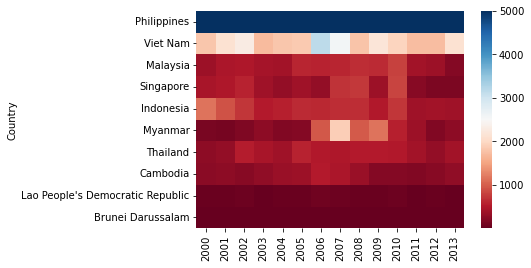

In [18]:
#your solution
gdp = df_can.loc[df_can.Region == 'South-Eastern Asia',2000:2013]
sns.heatmap(gdp, cmap="RdBu", vmax='5000')

## Marker Maps with Folium

#### j) We would like create a choropleth map to visualize the immigration data in 1980 from countries in Asia only. Create a relevant visualization for this. You should zoom your map to Asia, and use the yellow-green color scheme for the map.

In [19]:
import pandas as pd
country = pd.read_csv("countries.csv", index_col=0) #read in data from wine.csv
country.head() #display the first few data from the dataframe

,latitude,longitude,name
country,,,
AD,42.546245,1.601554,Andorra
AE,23.424076,53.847818,United Arab Emirates
AF,33.939110,67.709953,Afghanistan
AG,17.060816,-61.796428,Antigua and Barbuda
AI,18.220554,-63.068615,Anguilla


In [20]:
country = country.dropna()

In [27]:
import folium as folium
world_geo = 'world_countries.json' # geojson file
data1 = pd.merge(df_can, country.reset_index(), left_on='Country', right_on='name', how='right')
data = data1[data1.Continent == 'Asia']
world_map = folium.Map(location=[40, 100], zoom_start=3)

folium.Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=data,
    columns=['name', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)
	# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

	# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(data.latitude, data.longitude):
	incidents.add_child(
	    folium.CircleMarker(
	        [lat, lng],
	        radius=5, # define how big you want the circle markers to be
	        color='yellow',
	        fill=True,
	        fill_color='blue',
	        fill_opacity=0.6
	    )
	)
	 
	# add incidents to map
world_map.add_child(incidents)

#### k) Add markers for the top 10 countries (i.e. countries with most immigrants in 1980). When clicked, the mark should popup the country's name and the number of immigrants.

Hint: You may use HTML tags for the label text in the popup field.

The completed visualization should look like the one below:

<img src="https://i.ibb.co/QvXRT9s/map.png" alt="map" border="0" />

In [28]:
# instantiate a feature group for the incidents in the dataframe
world_map = folium.Map(location=[40, 100], zoom_start=3, tiles='CartoDB positron')
incidents = folium.map.FeatureGroup()
data = data.sort_values(by=1980, ascending=False)[:10]

folium.Choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=data,
    columns=['name', 1980],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(world_map)

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(data.latitude, data.longitude):
	incidents.add_child(
	    folium.CircleMarker(
	        [lat, lng],
	        radius=5, # define how big you want the circle markers to be
	        color='yellow',
	        fill=True,
	        fill_color='blue',
	        fill_opacity=0.6
	    )
	)
	# add pop-up text to each marker on the map
latitudes = list(data.latitude)
longitudes = list(data.longitude)
labels = list(data.name)

for i in range(len(labels)):
	labels[i] = labels[i] + '\n' + str(data.iloc[i][1980])

for lat, lng, label in zip(latitudes, longitudes, labels):
	folium.Marker([lat, lng], popup=label).add_to(world_map)    
	    
	# add incidents to map
world_map.add_child(incidents)

## Choropleth Maps with Plotly

#### l) Use Plotly to draw a similar choropleth map to visualization the total number of immigrants to Canada from various countries.

You may wish to refer to the documentation here:
https://plotly.com/python-api-reference/generated/plotly.express.choropleth.html

and the color scheme here:
https://plotly.com/python/builtin-colorscales/

In [ ]:
df_iso = pd.read_csv('ISO_Code.csv')
df_iso

,Country,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,??land Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS
...,...,...,...,...,...
241,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF
242,Western Sahara,EH,ESH,732,ISO 3166-2:EH
243,Yemen,YE,YEM,887,ISO 3166-2:YE
244,Zambia,ZM,ZMB,894,ISO 3166-2:ZM


In [ ]:
#your solution
import plotly.graph_objects as go
data = pd.merge(df_can, df_iso, left_on='Country', right_on='Country', how='left')
fig = go.Figure(data=go.Choropleth(
    locations = data['Alpha-3 code'],
	z = data['Total'],
	text = data['Total'],
	colorscale = 'Inferno',
	autocolorscale=False,
	reversescale=True,
	marker_line_color='darkgray',
	marker_line_width=0.5,
	colorbar_title = 'Total number of immigrants',
))
fig.show()

You may make scatter plots on maps in Plotly. Read this up at: https://plotly.com/python/scatter-plots-on-maps/

#### m) Hence, plot a scatter plots on the world map in Plotly to help visualize the total number of immigrants to Canada from various countries.

In [ ]:
import plotly.express as px
fig = px.scatter_geo(data, locations="Alpha-3 code",
                     size="Total", 
                     )
fig.show()

How does this scatter plot compare to maps with markers in folium?

    Can clearly compare the total immigration as humans can estimate areas better than colour